### AAYUSH GOYAL
### EE18BTECH11001
### Assignment 4

### Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats

In [2]:
def fLin(x, v1):
    return v1[1]*x+v1[0]

def fquad(x, v2):
    return v2[2]*x**2 + v2[1]*x + v2[0]

def fcub(x, v3):
    return v3[3]*x**3 + v3[2]*x**2 + v3[1]*x + v3[0]
data = data = np.loadtxt( 'https://www.iith.ac.in/~shantanud/testdata.dat')
x = data[:,0]
y = data[:,1]
sigma_y = data[:,2]
v1 = np.array([0, 0])
v2 = np.array([0, 0, 0])
v3 = np.array([0, 0, 0, 0])

In [3]:
def logL(ta, n):
    if n==1:
        y_fit = fLin(x, ta)
    elif n==2:
        y_fit = fquad(x, ta)
    elif n==3:
        y_fit = fcub(x, ta)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

In [4]:
def optimizer(n, tval):
    t0 = np.zeros(n+1)
    if n==1:
        nl = lambda theta: -logL(theta, 1)
        return optimize.fmin_bfgs(nl, t0, disp=False)
    if n==2:
        nl = lambda theta: -logL(theta, 2)
        return optimize.fmin_bfgs(nl, t0, disp=False)
    if n==3:
        nl = lambda theta: -logL(theta, 3)
        return optimize.fmin_bfgs(nl, t0, disp=False)

In [5]:
def pval(n):
    return 1-stats.chi2(n-1).cdf(compute_chi2(1) - compute_chi2(n))

In [6]:
r1 = optimizer(1, v1)
r2 = optimizer(2, v2)
r3 = optimizer(3, v3)

In [7]:
def compute_chi2(n):
    if n==1:
        theta = optimizer(n, v1)
        resid = ((y - fLin(x, theta)) / sigma_y)
    elif n==2:
        theta = optimizer(n, v2)
        resid = ((y - fquad(x, theta)) / sigma_y)
    elif n==3:
        theta = optimizer(n, v3)
        resid = ((y - fcub(x, theta)) / sigma_y)

    return np.sum(resid ** 2)

def compute_dof(degree, data=data):
    return data.shape[0] - (degree + 1)

def chi2_ll(n):
    chi2 = compute_chi2(n)
    dof = compute_dof(n)
    return stats.chi2(dof).pdf(chi2)

Log L values

In [8]:
print("linear:", logL(optimizer(1, v1), 1))
print("quadratic:", logL(optimizer(2, v2), 2))
print("cubic:", logL(optimizer(3, v3), 3))

linear: 22.018343408036255
quadratic: 22.924910312002734
cubic: 23.13040925879724


 $chi^{2}$ likelihood

In [9]:
print("linear :    ", chi2_ll(1))
print("quadratic: ", chi2_ll(2))
print("cubic: ", chi2_ll(3))

linear :     0.04538379558592037
quadratic:  0.03660844755014173
cubic:  0.04215280601015204


p value

In [10]:
print("quadratic: ", pval(2))
print("cubic: ", pval(3))

quadratic:  0.17813275695316344
cubic:  0.328878844196528


AICc values

In [11]:
a1 = -2*logL(r1, 1) + (2.0*2*20)/(17.0)
a2 = -2*logL(r2, 2) + (2.0*3*20)/(16.0)
a3 = -2*logL(r3, 3) + (2.0*4*20)/(15.0)
print("linear:", a1)
print("quadratic:", a2)
print("cubic:", a3)

linear: -39.33080446313134
quadratic: -38.34982062400547
cubic: -35.594151850927815


Delta AIC values

In [12]:
amin = min(a1, a2, a3)
print("linear:", a1-amin)
print("quadratic:", a2-amin)
print("cubic:", a3-amin)

linear: 0.0
quadratic: 0.9809838391258694
cubic: 3.736652612203521


BIC vlaues

In [13]:
b1 = -2*logL(r1, 1) + 2*np.log(x.shape[0])
b2 = -2*logL(r2, 2) + 3*np.log(x.shape[0])
b3 = -2*logL(r3, 3) + 4*np.log(x.shape[0])
print("linear:", b1)
print("quadratic:", b2)
print("cubic:", b3)

linear: -38.04522226896453
quadratic: -36.862623803343496
cubic: -34.27788942337852


Delta BIC values

In [14]:
bmin = min(b1, b2, b3)
print("linear:", b1-bmin)
print("quadratic:", b2-bmin)
print("cubic:", b3-bmin)

linear: 0.0
quadratic: 1.1825984656210338
cubic: 3.7673328455860116


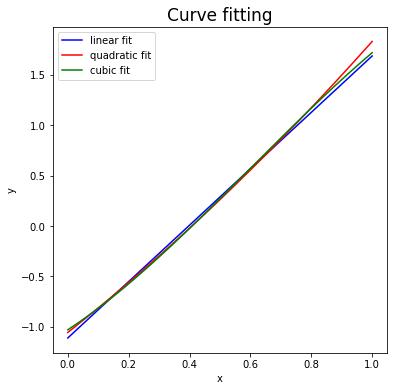

In [15]:
t =  np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(t, fLin(t, r1), label='linear fit' , color = 'b')
plt.plot(t, fquad(t, r2), label='quadratic fit' , color='r')
plt.plot(t, fcub(t, r3), label='cubic fit' , color='g')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Curve fitting", size=17)
plt.show()

### Q4

In [18]:
higgsp = 0.1**np.array([1,2,3,5,7,9])
higgs_sig = stats.norm.isf(higgsp)
print("the significance in terms of no of sigmas of the Higgs boson discovery claim :" , higgs_sig)

the significance in terms of no of sigmas of the Higgs boson discovery claim : [1.28155157 2.32634787 3.09023231 4.26489079 5.19933758 5.99780702]


In [19]:
ligo_sig = stats.norm.isf(2e-7)
print("the significance in terms of no of sigmas of the LIGO discovery claim :" , ligo_sig)

the significance in terms of no of sigmas of the LIGO discovery claim : 5.068957749717791


In [20]:
print("$Chi^{2}$ value GOF :", stats.chi(67).sf(65.2))

$Chi^{2}$ value GOF : 0.0
